# D209 - Data Mining I
___
## Performance Assessment - Task 2: Predictive Analysis
### Telecommunications Churn Data Set (Clean)
---
<br></br>

## Part I - Research Question

### A1: Proposal of Question

The central research question addressed by this analysis is to determine:

>Can these data be used to reliably predict customer retention (`Tenure`) via a random forest regression model and, if so, which features are most important?

With regard to hypothesis testing, our null hypothesis ($H_0$) is:

>There are no reliable predictors of customer retention (`Tenure`) that can be observed via a random forest regression model of the available data. 

Additionally, our alternate hypothesis ($H_1$) is:

>Customer retention (`Tenure`) can be predicticted with reasonable reliability via a random forest regression model of the available data.

### A2: Defined Goal

The primary goal of the following analysis is to discover whether or not the tenure (`Tenure`) of a customer can be predicted with a reasonable level of accuracy using the available data in the *Telecommunications Churn* dataset. Additionally, provided the features in the dataset allow for this prediction, the secondary goal will be to identify which features are most useful in predicting tenure. Knowing which features most contribute to the prediction will allow for additional resources to be utilized in gathering precise and timely data and focusing an appropriate proportion of retention efforts in the right direction. This analysis will be conducted using the $\hbox{Python}$ programming language using libraries including `pandas`, `sklearn`, `plotly`, and others to acheive the stated objectives.

## Part II - Method Justification

### B1: Explanation of Prediction Method

The selected prediction method, `RandomForestRegressor`, is an ensmble method wherein the base estimator is the decision tree regressor. The base decision tree works within the confines of predetermined hyperparameters which dictate a cost function (when decision tree is regressor), maxmimum depth, and a number of other optional parameters. In the case of this analysis, the selected cost function is mean squared error (MSE). The underlying decision tree uses MSE to determine the feature and criteria that will result in a binary split of the training set that minimizes the cost function. If no other hyperparameter is employed, the process is repeated recursively until no split can be made that would reduce the cost function. The hyperparameter `max_depth` indicates a condition which, if met, causes the cessation of recursive splitting. The depth of a tree is increased by 1 for each recursive split. So, for example, a tree that splits the initial dataset, then splits the two subsets, then splits those four sub-subsets would have a depth equal to 3. As mentioned, additional hyperparameters offer other criteria to be met in similar fashion.
<br>Due to the issues of overfitting and sensitivity, decision trees on their own are often not quite as useful as random forests, which employ an armada of randomized decision trees and aggregate the many trees' outputs to arrive at a result. The `RandomForestRegressor` is instantiated with a determined number of estimators which is the total number of underlying decision trees. Additionally, the same hyperparameters can be defined such as `max_depth`, `min_samples_leaf`, etc. Instead of choosing the feature that best reduces the cost function, a random forest selects a subset of features at random (as the name implies) and then selects the feature among the random subset which best reduces the cost function, which mitigates some of the aforementioned drawbacks of decision trees. Finally, the result is the mean output of all estimators for a given $x_1$ record.
<br>The expected outcome of the model is the predicted `Tenure` (in months) of a given record based on the predictor features of that record. A reasonably reliable model could potentially help identify the most important predictors of tenure.

### B2: Summary of Method Assumptions

The `RandomForestRegressor` assumes that the sampling of training data is truly representative of the population. Because the model in self-contained within the bounds of the training data, it is range-bound to the training set. Therefore, the model assumes the training data are appropriately representative.   

### B3: Packages/Libraries List

The following $\hbox{Python}$ libraries and packages will be utilized in this analysis:
 - `pandas`
 - `numpy`
 - `plotly.express`
 - `ColumnTransformer` from `sklearn.compose`
 - `OneHotEncoder` from `sklearn.preprocessing`
 - `train_test_split` & `RandomizedSearchCV` from `sklearn.model_selection`
 - `RandomForestRegressor` from `sklearn.ensemble`
 - `mean_squared_error` from `sklearn.metrics`
 - `residuals_plot` from `yellowbrick.regressor`
 - `feature_importances` from `yellowbrick.model_selection`
 - `dtreeviz.trees`

**Pandas**

 - The `pandas` library will be heavily relied upon for the initial import, filtering and general preparation of the data prior to running our analysis. 

**Numpy**

 - The `numpy` library will be used to create arrays for cross-validation and hyperparameter tuning of the model. 

**Plotly Express**

 - The `Plotly Express` library will be used to graphically represent the composition of the data and any other similar visual as needed.

**ColumnTransformer**

 - The `ColumnTransformer` package from the `sklearn.compose` library will be used to handle pre-processing treatment for columns of different dtypes.

**OneHotEncoder**

 - The `OneHotEncoder` package from the `sklearn.preprocessing` library will be used to tranform categorical features in pre-processing.

**Train_test_split**

 - The `train_test_split` package from the `sklearn.model_selection` library will be used to facilitate the splitting of the sub-selected dataset. It provides a quick and easy way to select a random sample to reserve for testing the model once trained.

**RandomizedSearchCV**

 - The `RandomizedSearchCV` package from the `sklearn.model_selection` library will be used to cross-validate the model and assist in hyperparameter tuning.

**RandomForestRegressor**

 - The `RandomForestRegressor` package from the `sklearn.ensemble` library is the primary estimator of the model.

**Mean_squared_error**

 - The `mean_squared_error` package from the `sklearn.metrics` library will be used to evaluate the accuracy model.  

**Residuals_plot**

 - The `residuals_plot` package from the `yellowbrick.regressor` library will be used to plot the residuals of the final model.  

**Feature_importances**

 - The `Feature_importances` package from the `yellowbrick.model_selection` library will be used to visualize the most important features of the final model.  

**DTreeViz Trees**

 - The `dtreeviz.trees` library will be used to graphically represent an example of the underlying decision trees.

## Part III - Data Preparation

### C1: Data Preprocessing

The process we will need to complete in order to prepare the data for training is relatively minor, given that the raw dataset used in this project has already been cleaned in a prior project. Using the pre-cleaned dataset, we will first partition the data to include only those variables we intend to feed into our model. As described above, our model input will consist of the target feature `Tenure` (continuous) and will include 26 predictor features (continuous, discrete, and categorical).

Next, we will need to ensure that the data type of each variable is appropriate for that kind of feature. Finally, we will ensure that categorical features are transformed with OneHotEncoder to make it easier for the model to handle and then split the dataset into training and testing sets with proportions of 70% and 30% respectively.

### C2: Dataset Variables

As addressed above, the variables to be used in the model and analysis will consist of the below:

|Feature|DType|DSubtype|Feature Type|
|:-:|:-:|:-:|:-:|
|`Tenure`|Numeric|Continuous|Target|
|`Children`|Numeric|Discrete|Predictor|
|`Age`|Numeric|Discrete|Predictor|
|`Income`|Numeric|Continuous|Predictor|
|`Marital`|Categorical|Nominal|Predictor|
|`Gender`|Categorical|Nominal|Predictor|
|`Outage_sec_perweek`|Numeric|Continuous|Predictor|
|`Email`|Numeric|Discrete|Predictor|
|`Contacts`|Numeric|Discrete|Predictor|
|`Yearly_equip_failure`|Numeric|Discrete|Predictor|
|`Techie`|Categorical|Binary|Predictor|
|`Contract`|Categorical|Nominal|Predictor|
|`Port_modem`|Categorical|Binary|Predictor|
|`Tablet`|Categorical|Binary|Predictor|
|`InternetService`|Categorical|Nominal|Predictor|
|`Phone`|Categorical|Binary|Predictor|
|`Multiple`|Categorical|Binary|Predictor|
|`OnlineSecurity`|Categorical|Binary|Predictor|
|`OnlineBackup`|Categorical|Binary|Predictor|
|`DeviceProtection`|Categorical|Binary|Predictor|
|`TechSupport`|Categorical|Binary|Predictor|
|`StreamingTV`|Categorical|Binary|Predictor|
|`StreamingMovies`|Categorical|Binary|Predictor|
|`PaperlessBilling`|Categorical|Binary|Predictor|
|`PaymentMethod`|Categorical|Nominal|Predictor|
|`MonthlyCharge`|Numeric|Continuous|Predictor|
|`Bandwidth_GB_Year`|Numeric|Continuous|Predictor|

### C3: Steps for Analysis

The following steps were taken to perform the analysis:

*The steps enumerated correspond to code segments in section D3*

- Step 1 - Load in libraries and dataset
  - This initial step involves importing the necessary libraries and modules as well as reading-in the initial dataset. Finally, the initial dataset is inspected using the `.info()` method to take a quick glance at all of the features and ensure no NaNs are present.
- Step 2 - Subset data & initial EDA
   - This step takes the initial dataset and selects out the features that will be used in the analysis. Those features are explored using descriptive statistics and some simple visualizations. 
- Step 3 - Prepare subset data for analysis
   - The subset data is then prepared by ensuring the correct datatypes are used (setting categorical features to category type), then using `ColumnTransformer` and `OneHotEncoder` to encode those categorical features. Finally, the dataset is split using `train_test_split` for training and testing.
- Step 4 - Initial model fit and evaluation
   - A range of hyperparameters is given for the process of hyperparameter tuning. The estimator `RandomForestRegressor` is then instantiated as well as the `RandomizedSearchCV` tool for cross-validation. The model is then fit using the training data.
- Step 5 - Revised model fit and evaluation
   - Once the model has been fit, the model is then validated on the training set to assess it's accuracy. After this is complete, a secondary model is prepared to be fit using the learnings from the first model. 
- Step 6 - Model visualizations
   - Finally, the model results are visualized using the `yellowbrick` and `dtreeviz` libraries to provide further intuition and clarity.

### C4: Cleaned Dataset

`df.to_csv('./data/d209_task2_cleaned_dataset.csv')`

*Please see attached d209_task2_cleaned_dataset.csv file*

## Part IV - Analysis

### D1: Splitting the Data

We will use the module `train_test_split` from the `sklearn` library to split the dataset. This tool makes the process of splitting quite simple. The split percentage will be 70/30 with 70% of the total observations utilized in training the model, while the remaining 30% will be reserved for testing the model. Additionally, as described in the code below, a random seed of 42 was chosen for the randomization. Seed 42 was chosen at random as well and was used for sampling previously during EDA visualizations.

```
# Split data using 70/30 split and seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

### D2: Output & Intermediate Calculations

This analysis consists primarily of the $RandomForestRegressor$ and determining the optimal values for the model hyperparameters. After first preparing the data for analysis, EDA steps such as preparing descriptive statistics and visualizations of the data (through the use of scatter plots and histograms on the selected features) are used to gain a bit of perspective prior to modelling. After EDA, a preliminary model is instantiated and fit to the training data. The $RandomForestRegressor$ estimator is fed into a hyperparameter tuning tool ($RandomizedSearchCV$) to handle both the cross-validation as well as optimization of hyperparameter values. The cross-validator will use five bootstrapped folds of the training set and contain a grid of the parameters `n_estimators`, `max_depth`, and `min_samples_leaf` with value ranges of 500-2000, 5-40, and 0.01-0.20 respectively. The five folds will be randomly iterated over 200 times each creating a total of 1,000 random fits of the $RandomForestRegressor$. Once this is done, the CV results will be assessed. The best parameters will be considered along with the descriptive statistics of the top 1/2 (by CV score) of the assessed fits' parameters. Following that, revised hyperparameter ranges will be used and the process will repeat to produce our final model.

In [1]:
# Load in required packages
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from yellowbrick.regressor import residuals_plot
from yellowbrick.model_selection import feature_importances
from dtreeviz.trees import *

# Read in initial dataset and check .info()
df = pd.read_csv('./data/churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
# Subset data by features to be included in model
df = df.iloc[:, np.r_[14:19, 20:42]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  Port_modem            10000 non-null  object 
 12  Tablet                10000 non-null  object 
 13  InternetService       10000 non-null  object 
 14  Phone                 10000 non-null  object 
 15  Multiple            

In [3]:
# Show descriptive statistics for numeric data
df.describe().T

count          mean           std         min  \
Children              10000.0      2.087700      2.147200    0.000000   
Age                   10000.0     53.078400     20.698882   18.000000   
Income                10000.0  39806.926771  28199.916702  348.670000   
Outage_sec_perweek    10000.0     10.001848      2.976019    0.099747   
Email                 10000.0     12.016000      3.025898    1.000000   
Contacts              10000.0      0.994200      0.988466    0.000000   
Yearly_equip_failure  10000.0      0.398000      0.635953    0.000000   
Tenure                10000.0     34.526188     26.443063    1.000259   
MonthlyCharge         10000.0    172.624816     42.943094   79.978860   
Bandwidth_GB_Year     10000.0   3392.341550   2185.294852  155.506715   

                               25%           50%           75%            max  
Children                  0.000000      1.000000      3.000000      10.000000  
Age                      35.000000     53.000000     71.000000      89.000000  
Income                19224.717500  33170.605000  53246.170000  258900.700000  
Outage_sec_perweek        8.018214     10.018560     11.969485      21.207230  
Email                    10.000000     12.000000     14.000000      23.000000  
Contacts                  0.000000      1.000000      2.000000       7.000000  
Yearly_equip_failure      0.000000      0.000000      1.000000       6.000000  
Tenure                    7.917694     35.430507     61.479795      71.999280  
MonthlyCharge           139.979239    167.484700    200.734725     290.160419  
Bandwidth_GB_Year      1236.470827   3279.536903   5586.141370    7158.981530

In [4]:
# Show correlation betwean continuous features
dffloats = df[df.columns[df.dtypes == 'float64']]
dffloats.corr()

Income  Outage_sec_perweek    Tenure  MonthlyCharge  \
Income              1.000000           -0.010011  0.002114      -0.003014   
Outage_sec_perweek -0.010011            1.000000  0.002932       0.020496   
Tenure              0.002114            0.002932  1.000000      -0.003337   
MonthlyCharge      -0.003014            0.020496 -0.003337       1.000000   
Bandwidth_GB_Year   0.003674            0.004176  0.991495       0.060406   

                    Bandwidth_GB_Year  
Income                       0.003674  
Outage_sec_perweek           0.004176  
Tenure                       0.991495  
MonthlyCharge                0.060406  
Bandwidth_GB_Year            1.000000

In [5]:
# Subset numeric features and show histograms
df_num_cols = [x for x in df.describe().columns]
df_num = df[df_num_cols]
for i in df_num.columns:
    px.histogram(
        df_num.sample(500, random_state=42),
        x=i,
        width=500,
        height=300,
        nbins=30,
        template='seaborn'
    ).show()

In [6]:
# Plot Tenure vs Outage_sec_perweek
px.scatter(df.sample(500, random_state=42),
           x='Tenure',
           y='Outage_sec_perweek',
           width=700,
           template='seaborn')

In [7]:
# Plot MonthlyCharge vs Outage_sec_perweek
px.scatter(df.sample(500, random_state=42),
           x='MonthlyCharge',
           y='Outage_sec_perweek',
           width=700,
           template='seaborn')

In [8]:
# Plot Tenure vs Bandwidth_GB_Year
px.scatter(df.sample(500, random_state=42),
           x='Bandwidth_GB_Year',
           y='Tenure',
           width=700,
           template='seaborn')

In [9]:
# Converty dtypes for categorical features
df = df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Children              10000 non-null  int64   
 1   Age                   10000 non-null  int64   
 2   Income                10000 non-null  float64 
 3   Marital               10000 non-null  category
 4   Gender                10000 non-null  category
 5   Outage_sec_perweek    10000 non-null  float64 
 6   Email                 10000 non-null  int64   
 7   Contacts              10000 non-null  int64   
 8   Yearly_equip_failure  10000 non-null  int64   
 9   Techie                10000 non-null  category
 10  Contract              10000 non-null  category
 11  Port_modem            10000 non-null  category
 12  Tablet                10000 non-null  category
 13  InternetService       10000 non-null  category
 14  Phone                 10000 non-null  category
 15  Mul

In [10]:
# Assign X, y
X = df.drop(['Tenure'], axis=1)
y = df.Tenure

# Instantiate ColumnTransformer for OneHotEncoding and fit
ct = ColumnTransformer(
    [('cat', OneHotEncoder(), X.columns[X.dtypes == 'category'].tolist())],
    remainder='passthrough')
X = ct.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### D3: Code Execution

#### Step 1 - Load in libraries and dataset

In [11]:
# Load in required packages
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from yellowbrick.regressor import residuals_plot
from yellowbrick.model_selection import feature_importances
from dtreeviz.trees import *

# Read in initial dataset and check .info()
df = pd.read_csv('./data/churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### Step 2 - Subset data & initial EDA


In [12]:
# Subset data by features to be included in model
df = df.iloc[:, np.r_[14:19, 20:42]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  Port_modem            10000 non-null  object 
 12  Tablet                10000 non-null  object 
 13  InternetService       10000 non-null  object 
 14  Phone                 10000 non-null  object 
 15  Multiple            

In [13]:
# Show descriptive statistics for numeric data
df.describe().T

count          mean           std         min  \
Children              10000.0      2.087700      2.147200    0.000000   
Age                   10000.0     53.078400     20.698882   18.000000   
Income                10000.0  39806.926771  28199.916702  348.670000   
Outage_sec_perweek    10000.0     10.001848      2.976019    0.099747   
Email                 10000.0     12.016000      3.025898    1.000000   
Contacts              10000.0      0.994200      0.988466    0.000000   
Yearly_equip_failure  10000.0      0.398000      0.635953    0.000000   
Tenure                10000.0     34.526188     26.443063    1.000259   
MonthlyCharge         10000.0    172.624816     42.943094   79.978860   
Bandwidth_GB_Year     10000.0   3392.341550   2185.294852  155.506715   

                               25%           50%           75%            max  
Children                  0.000000      1.000000      3.000000      10.000000  
Age                      35.000000     53.000000     71.000000      89.000000  
Income                19224.717500  33170.605000  53246.170000  258900.700000  
Outage_sec_perweek        8.018214     10.018560     11.969485      21.207230  
Email                    10.000000     12.000000     14.000000      23.000000  
Contacts                  0.000000      1.000000      2.000000       7.000000  
Yearly_equip_failure      0.000000      0.000000      1.000000       6.000000  
Tenure                    7.917694     35.430507     61.479795      71.999280  
MonthlyCharge           139.979239    167.484700    200.734725     290.160419  
Bandwidth_GB_Year      1236.470827   3279.536903   5586.141370    7158.981530

In [14]:
# Show correlation betwean continuous features
dffloats = df[df.columns[df.dtypes == 'float64']]
dffloats.corr()

Income  Outage_sec_perweek    Tenure  MonthlyCharge  \
Income              1.000000           -0.010011  0.002114      -0.003014   
Outage_sec_perweek -0.010011            1.000000  0.002932       0.020496   
Tenure              0.002114            0.002932  1.000000      -0.003337   
MonthlyCharge      -0.003014            0.020496 -0.003337       1.000000   
Bandwidth_GB_Year   0.003674            0.004176  0.991495       0.060406   

                    Bandwidth_GB_Year  
Income                       0.003674  
Outage_sec_perweek           0.004176  
Tenure                       0.991495  
MonthlyCharge                0.060406  
Bandwidth_GB_Year            1.000000

In [15]:
# Subset numeric features and show histograms
df_num_cols = [x for x in df.describe().columns]
df_num = df[df_num_cols]
for i in df_num.columns:
    px.histogram(
        df_num.sample(500, random_state=42),
        x=i,
        width=500,
        height=300,
        nbins=30,
        template='seaborn'
    ).show()

In [16]:
# Plot Tenure vs Outage_sec_perweek
px.scatter(df.sample(500, random_state=42),
           x='Tenure',
           y='Outage_sec_perweek',
           width=700,
           template='seaborn')

In [17]:
# Plot MonthlyCharge vs Outage_sec_perweek
px.scatter(df.sample(500, random_state=42),
           x='MonthlyCharge',
           y='Outage_sec_perweek',
           width=700,
           template='seaborn')

In [18]:
# Plot Tenure vs Bandwidth_GB_Year
px.scatter(df.sample(500, random_state=42),
           x='Bandwidth_GB_Year',
           y='Tenure',
           width=700,
           template='seaborn')

#### Step 3 - Prepare subset data for analysis

In [19]:
# Converty dtypes for categorical features
df = df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Children              10000 non-null  int64   
 1   Age                   10000 non-null  int64   
 2   Income                10000 non-null  float64 
 3   Marital               10000 non-null  category
 4   Gender                10000 non-null  category
 5   Outage_sec_perweek    10000 non-null  float64 
 6   Email                 10000 non-null  int64   
 7   Contacts              10000 non-null  int64   
 8   Yearly_equip_failure  10000 non-null  int64   
 9   Techie                10000 non-null  category
 10  Contract              10000 non-null  category
 11  Port_modem            10000 non-null  category
 12  Tablet                10000 non-null  category
 13  InternetService       10000 non-null  category
 14  Phone                 10000 non-null  category
 15  Mul

In [20]:
# Assign X, y
X = df.drop(['Tenure'], axis=1)
y = df.Tenure

# Instantiate ColumnTransformer for OneHotEncoding and fit
ct = ColumnTransformer(
    [('cat', OneHotEncoder(), X.columns[X.dtypes == 'category'].tolist())],
    remainder='passthrough')
X = ct.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 4 - Initial model fit and evaluation

In [21]:
# Original model
# Create grid for RandomizedSearchCV
n_estimators = np.arange(500, 2000, 250)
max_depth = np.arange(5, 40, 5)
min_samp = np.arange(.01, .2, .04)

# Declare grid dictionary
rs_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samp,
}

# Instantiate base estimator
rf = RandomForestRegressor(random_state=42,
                           n_jobs=-1,
                           bootstrap=True,
                           max_features='sqrt')

# Instantiate cross-val
rscv_rf = RandomizedSearchCV(estimator=rf,
                             param_distributions=rs_grid,
                             n_iter=200,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,
                             cv=5,
                             verbose=10,
                             random_state=42,
                             return_train_score=True)

# Fit model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   n_jobs=-1, random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35]),
                                        'min_samples_leaf': array([0.01, 0.05, 0.09, 0.13, 0.17]),
                                        'n_estimators': array([ 500,  750, 1000, 1250, 1500, 1750])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=10)

In [22]:
# Create dataframe of top 1/2 estimators sorted by score
dfdict = {}
for i, x in enumerate(pd.DataFrame(rscv_rf.cv_results_).sort_values('rank_test_score').iloc[:100].params):
    dfdict[i] = x
cvdf = pd.DataFrame(dfdict).T.describe()
cvdf.n_estimators = cvdf.n_estimators.astype('int')
cvdf.min_samples_leaf = cvdf.min_samples_leaf.round(2)
cvdf.max_depth = cvdf.max_depth.astype('int')

# Declare best parameter values for below
n_est = rscv_rf.best_params_['n_estimators']
ms = rscv_rf.best_params_['min_samples_leaf']
md = rscv_rf.best_params_['max_depth']

# Get best estimator and score accuracy of training and test sets
bestrf = rscv_rf.best_estimator_
trainscore = bestrf.score(X_train, y_train)
testscore = bestrf.score(X_test, y_test)

# Create predictions from test and evaluate RMSE
y_pred = bestrf.predict(X_test)
rmse_rf = MSE(y_test, y_pred) ** 0.5

# Print model results
print(f'''---Model Results---

Cross Validation Parameter Results:
----------------------------------
{cvdf}

Best Estimator Params:
----------------------
Best n_estimators: {n_est}
Best min_samples_leaf: {ms}
Best max_depth: {md}

Best Estimator Scoring:
----------------------
Training score:  {trainscore.round(4)}
Testing score:  {testscore.round(4)}
RMSE:  {rmse_rf.round(2)}
''')

---Model Results---

Cross Validation Parameter Results:
----------------------------------
       n_estimators  min_samples_leaf  max_depth
count           100            100.00        100
mean           1085              0.04         20
std             417              0.03         10
min             500              0.01          5
25%             750              0.01         10
50%            1000              0.05         20
75%            1500              0.05         30
max            1750              0.09         35

Best Estimator Params:
----------------------
Best n_estimators: 500
Best min_samples_leaf: 0.01
Best max_depth: 25

Best Estimator Scoring:
----------------------
Training score:  0.8238
Testing score:  0.8159
RMSE:  11.32



#### Step 5 - Revised model fit and evaluation

In [23]:
# Revised model
# Create grid for RandomizedSearchCV
n_estimators = np.arange(400, 1400, 100)
max_depth = np.arange(10, 30, 2)

# Declare grid dictionary
rs_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

# Instantiate base estimator
rf = RandomForestRegressor(random_state=42,
                           n_jobs=-1,
                           bootstrap=True,
                           max_features='sqrt')

# Instantiate cross-val
rscv_rf = RandomizedSearchCV(estimator=rf,
                             param_distributions=rs_grid,
                             n_iter=100,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,
                             cv=5,
                             verbose=10,
                             random_state=42,
                             return_train_score=True,
                             ) 

# Fit model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([ 400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=10)

In [24]:
# Create dataframe of top 1/2 estimators sorted by score
dfdict_rev = {}
for i, x in enumerate(pd.DataFrame(rscv_rf.cv_results_).sort_values('rank_test_score').iloc[:50].params):
    dfdict_rev[i] = x
cvdf_rev = pd.DataFrame(dfdict_rev).T.describe()
cvdf_rev.n_estimators = cvdf_rev.n_estimators.astype('int')
cvdf_rev.max_depth = cvdf_rev.max_depth.astype('int')

# Declare best parameter values for below
n_est_rev = rscv_rf.best_params_['n_estimators']
md_rev = rscv_rf.best_params_['max_depth']
bestrf_rev = rscv_rf.best_estimator_

# Get best estimator and score accuracy of training and test sets
trainscore_rev = bestrf_rev.score(X_train, y_train)
testscore_rev = bestrf_rev.score(X_test, y_test)

# Create predictions from test and evaluate RMSE
y_pred = bestrf_rev.predict(X_test)
rmse_rf_rev = MSE(y_test, y_pred) ** 0.5

# Get feature importances from best estimator
featimp = bestrf_rev.feature_importances_.tolist()

# Print revised model results
print(f'''---Model Results---

Cross Validation Parameter Results:
----------------------------------
{cvdf_rev}

Best Estimator Params:
----------------------
Best n_estimators: {n_est_rev}
Best max_depth: {md_rev}

Best Estimator Scoring:
----------------------
Training score:  {trainscore_rev.round(4)}
Testing score:  {testscore_rev.round(4)}
RMSE:  {rmse_rf_rev.round(2)}
''')

---Model Results---

Cross Validation Parameter Results:
----------------------------------
       n_estimators  max_depth
count            50         50
mean            850         24
std             290          2
min             400         20
25%             600         22
50%             850         24
75%            1100         26
max            1300         28

Best Estimator Params:
----------------------
Best n_estimators: 400
Best max_depth: 20

Best Estimator Scoring:
----------------------
Training score:  0.9931
Testing score:  0.9551
RMSE:  5.59



#### Step 6 - Model visualizations

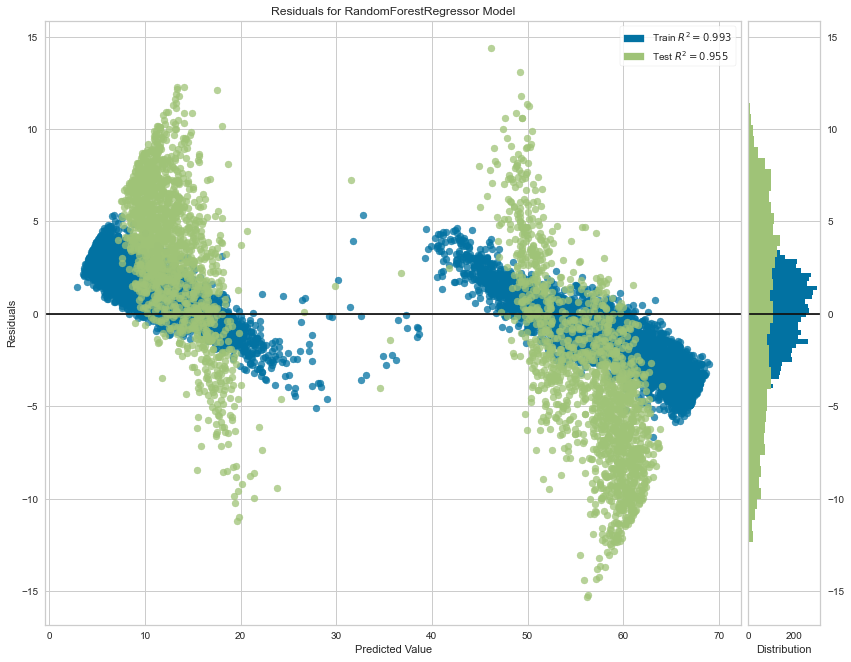

In [25]:
# PLot residuals for training and test sets
resplt = residuals_plot(bestrf_rev,
                        X_train,
                        y_train,
                        X_test,
                        y_test,
                        size=(1000,800))

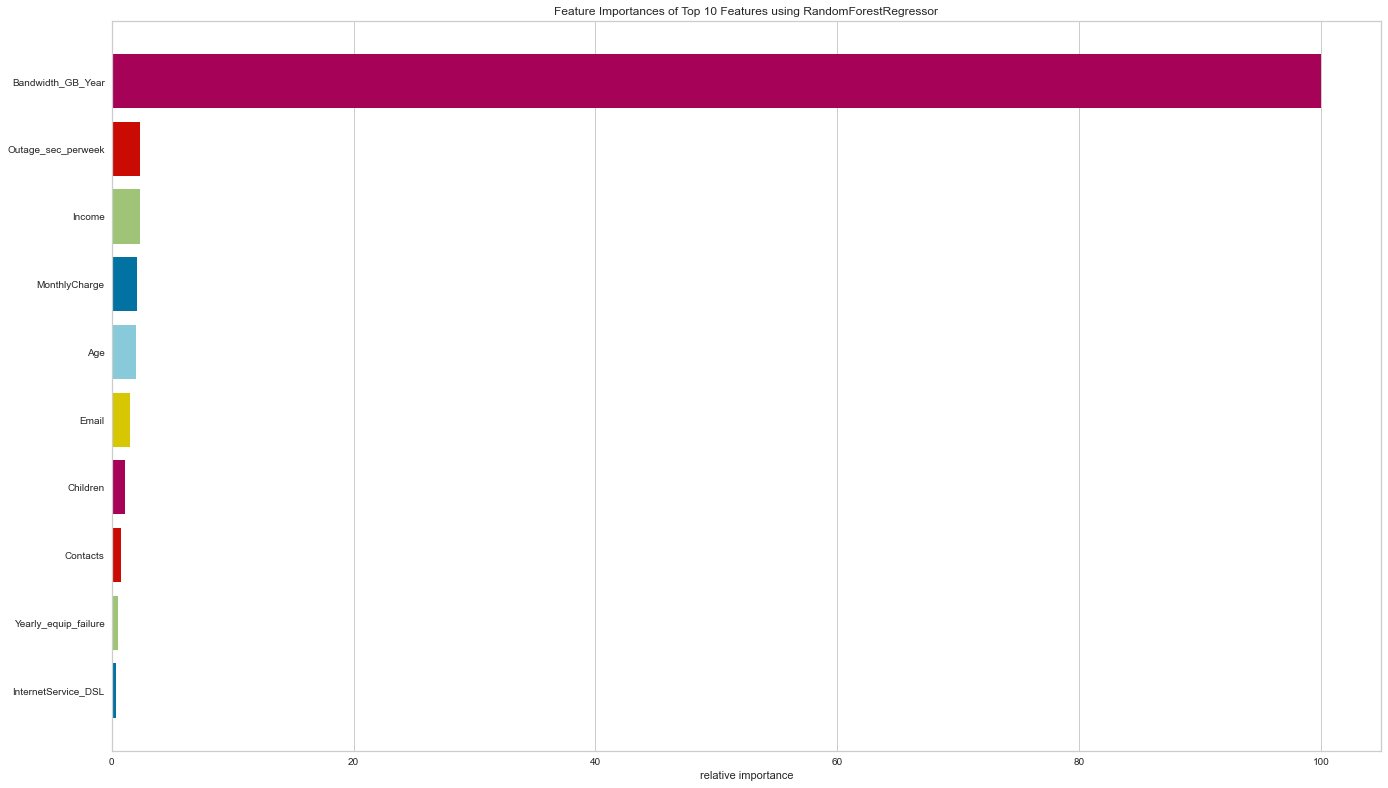

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [26]:
# Replace category name prefix with actual category name
catnames = df.dtypes[df.dtypes == 'category'].index.tolist()
ohecats = ct.get_feature_names()
for i, x in enumerate(ohecats):
    if x[:3] == 'cat':
        n = int(x[x.find('x')+1:x.rfind('_')])
        ohecats[i] = x.replace(x[:x.rfind('_')], catnames[n])

# Plot top 10 feature importances from best estimator sorted by highest importance
fi = feature_importances(bestrf_rev, X_train, X_test, size=(1400,800), labels=ohecats, topn=10, relative=True, dpi=500)
fi.show()

In [27]:
# Plot example regression decision tree at a depth of 5
# to illustrate underlying estimator
dtv = dtreeviz(bestrf_rev.estimators_[0],
               x_data=X_train,
               y_data=y_train,
               target_name='Tenure',
               feature_names=ohecats,
               title='Decision Tree Regressor Visualization',
               depth_range_to_display=(0,5),
               orientation='LR'
       )
dtv

## Part V - Data Summary & Implications

### E1: Accuracy & MSE

The initial model performed quite well. The `.score()` method the the $RandomForestRegressor$ object defaults to the $R^2$ metric or the coefficient of determination. With a maximum $R^2$ of 1.0, the score for the training set of `0.8238` and `0.8159` on the test set represent a fairly high accuracy for the model. Additionally, the root mean squared error (RMSE) was determined on the test set and resulted in `11.32`. In other words, the average error in terms of `Tenure` (which is denominated in months) is `11.32` months. Considering the fact that the standard deviation of the `Tenure` feature, as we observed in our EDA process, is approximately 26 months, there is room for improvement, but the model appears to do a decent job.
After further hyperparameter tuning, the final model is incredibly accurate with an $R^2$ of `0.9931` on the training set and `0.9551` on the test set. This is an impressive score, particularly considering the cross-validation steps as well as the fact that the score on the training set is so high. Finally, the RMSE for the final model based on the training set is `5.59`, or in other words, the average error for the final model is `5.59` months. Based on the results shown here, both models, but the revised model in particular is exceptionally accurate. 

### E2: Results & Implications

As mentioned above, our model performed incredibly well in predicting a given client's tenure based on the predictor features identified in C2. As a result, our analysis supports the rejection of the null hypothesis ($H_0$) which states:

>There are no reliable predictors of customer retention (`Tenure`) that can be observed via a random forest regression model of the available data. 

Furthermore, our analysis supports the acceptance of the alternate hypothesis ($H_1$) which states:

>Customer retention (`Tenure`) can be predicticted with reasonable reliability via a random forest regression model of the available data.

Therefore, our initial research question (Can these data be used to reliably predict customer retention (`Tenure`) via a random forest regression model and, if so, which features are most important?) is answered in the affirmative based on the results of our above analysis.

The random forest regression model has done a remarkable job of predicting `Tenure`. With regard to implications, while the random forest algorithm is considered a "black box" algorithm, we can at least measure the feature importances of our best estimator which gives us a measure of insight into what features are most important in predicting `Tenure`. When this was measured and visualized above, we note that the feature `Bandwidth_GB_Year`, which is simply the average data in GB a customer uses in a year, was the most important feature by an incredibly large margin. In our EDA, we also noted that the correlation between `Tenure` and `Bandwidth_GB_Year` was extremely high. The in-depth exploration of the relationship between the two features lies outside of the scope of this analysis, however, it seems prudent to do so as a follow-up. Regardless, the top 5 most important features in predicting `Tenure` according to this model and in order of importance are:
 - `Bandwidth_GB_Year`
 - `Income`
 - `Outage_sec_perweek`
 - `MonthlyCharge` 
 - `Age`

This provides insight into further analysis that should be done in understanding what factors contribute to a customer's tenure and how the average tenure of a customer can be lengthened.

### E3: Limitations

One limitation of the analysis, which was briefly alluded to previously, is the limits of random forest regression with regard to the sampling data. To reiterate, the random forest regression algorithm predicts outcomes based on mean values accross $n$ decision trees using randomized feature selection. The decision tree splits are determined by minimizing the cost function mean squared error $MSE = \frac{1}{n}\sum_{i=1}^n (Y_i-\hat{Y})^2$ with each leaf node (the terminal node of the decision tree) averaging the target feature values of the samples split therein. This being the case, the algorithm, while enormously effective and versatile, lacks extrapolatory power. Because the model is, of necessity, range-bound to the sample data, it is unable to make predictions outside of that range. This issue becomes particularly limiting with a heteroskedastic sample set. However, for the purposes of this analysis, the random forest regression is an appropriate and effective tool.  

### E4: Course of Action

As a result of the analysis performed, it is recommended that the organization further explore the relationship between `Tenure` and `Bandwidth_GB_Year`. Because, according to this analysis, the bandwidth feature has an overstated importance in comparison to the other features measured, it seems probable that further analysis and understanding of that relationship could reveal key findings that relate to the prediction (and perhaps actions or attributes that could contribute to lengthening) of a customer's `Tenure`. Additionally, the other important features mentioned above (`Income`, `Outage_sec_perweek`, `MonthlyCharge`, and `Age`) should also be examined further as well as any relationship between them to help uncover additional insights into predicting customer retention.